In [176]:
from astropy.io import fits
from astropy.time import Time
import photutils
from photutils.centroids import centroid_sources, centroid_2dg, centroid_com
from photutils.aperture import CircularAperture, CircularAnnulus, aperture_photometry
import numpy as np
import glob
import math
import matplotlib.pyplot as plt 
import statistics
from photutils.datasets import make_4gaussians_image
from photutils.centroids import centroid_com, centroid_quadratic
from photutils.centroids import centroid_1dg, centroid_2dg
from scipy.optimize import curve_fit
import matplotlib as mpl
from matplotlib import rc
import matplotlib.pylab as plt
import matplotlib


In [177]:
directory = np.sort(glob.glob('/Users/macbookprodetubabu/Desktop/12.410/Observing 9.27.2022/r Data/Calibrated Data' + '/*.fit'))

file_number = 0
file_number_list = []
time_list_mjd = []

#comp star info: Gaia DR2 1869256770390337792, non-variable star of magnitude 10.33 in r' filter and 11.18 in g' filter

y_cyg_then_comp_star_x = [[472.36397, 414.73656]]
y_cyg_then_comp_star_y = [[494.76737, 474.59749]]

mag_dif_list = []

#Photometry:

for file in directory:
    file_number += 1
    # print(file_number)
    file_number_list.append(file_number)
    centroids = [(y_cyg_then_comp_star_x[0][0], y_cyg_then_comp_star_y[0][0]), (y_cyg_then_comp_star_x[0][1], y_cyg_then_comp_star_y[0][1])]
    apertures = CircularAperture(centroids, r = 16)
    annuluses = CircularAnnulus(centroids, r_in = 18, r_out = 35)
    ap_and_ann = [apertures, annuluses]

    fits_image = fits.open(file)
    image_data, image_header = fits_image[0].data, fits_image[0].header
    time_object = Time(image_header['DATE-OBS'], format = "isot")
    time_list_mjd.append(time_object.mjd)
    phot_analysis = aperture_photometry(image_data, ap_and_ann)


    background_mean = phot_analysis["aperture_sum_1"]/annuluses.area
    background_sum = background_mean * apertures.area
    star_signal_background_subtracted = phot_analysis["aperture_sum_0"] - background_sum
    phot_analysis["star_signal_background_subtracted"] = star_signal_background_subtracted

    for col in phot_analysis.colnames:
        phot_analysis[col].info.format = '%.8g'
    
    # print('target star flux:', phot_analysis["star_signal_background_subtracted"][0])
    # print('comp star flux:', phot_analysis["star_signal_background_subtracted"][1])
    # print('fluxes divided:', phot_analysis["star_signal_background_subtracted"][0]/ phot_analysis["star_signal_background_subtracted"][1])
    
    y_cyg_mag = -2.5*np.log10((phot_analysis["star_signal_background_subtracted"][0]/ phot_analysis["star_signal_background_subtracted"][1])) + 10.33
    mag_dif_list.append(y_cyg_mag)

    x_value_centroid, y_value_centroid = centroid_sources(image_data, y_cyg_then_comp_star_x[0], y_cyg_then_comp_star_y[0], box_size = 61, 
                                                          centroid_func = centroid_quadratic)

    y_cyg_then_comp_star_x[0] = x_value_centroid
    y_cyg_then_comp_star_y[0] = y_value_centroid

#     print(x_value_centroid, y_value_centroid)

#     print("mag:",y_cyg_mag)
        
  

    
#List of steps:
#iteration over files (keep track of file number)
#centroiding (maintain a list)
#bias/dark subtraction (shorter version)
#creating annulus (ring around background) and subtracting background
#creating aperature and performing photometry
#solving for magnitude of y-cyg
#plotting file number vs mag


mod_x: [0.0, 0.006567361007910222, 0.01313291658880189, 0.019689444510731846, 0.026248333335388452, 0.03281361109111458, 0.039372638741042465, 0.04593569441931322, 0.05249444441869855, 0.059057777747511864, 0.0656361110159196, 0.07219472219003364]
x_err_list: [0.0010956944315694273, 0.0010958334314636886, 0.0010955556062981486, 0.0010912499274127185, 0.001093472179491073, 0.0010937500046566129, 0.0010955556062981486, 0.0010936111793853343, 0.0010912499274127185, 0.0010937500046566129, 0.0010934723541140556, 0.0010912499274127185]
y [7.379610210572202, 7.363660150751903, 7.381642263570762, 7.359300706728268, 7.361649838702059, 7.362406029897079, 7.386662093726912, 7.378834457024897, 7.367615582971116, 7.363153155885796, 7.361603197148327, 7.358255907974817]
yerr_list [0.001437950275442508, 0.0005925311952213133, 0.001523218638286333, 0.002197122986917543, 0.007366060632127829, 0.0016431784631519097, 0.007385600487206858, 0.005218902461178218, 0.0008012202853873691, 0.034850253912126324,

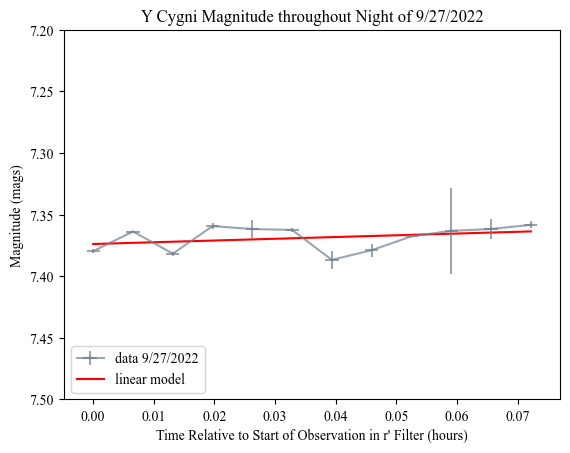

In [178]:
# print(file_number)
# print(len(directory))

plt.rcParams.update({
    "text.usetex": False,
    "font.family": "Times New Roman"
})

binned_file_number_for_mag = 0
binned_list_mag = []

del time_list_mjd[50:51]
del mag_dif_list[50:51]

yerr_list = []
y = []
for mag in mag_dif_list[52:90]:
    binned_file_number_for_mag += 1
    if binned_file_number_for_mag % 3 == 0:
        y.append(statistics.mean(binned_list_mag))
        yerr_list.append(statistics.stdev(binned_list_mag))
        binned_list_mag = []
    else:
        binned_list_mag.append(mag)
    
binned_file_number_for_time = 0
binned_list_time = []  

xerr_list = []
x = []

for time in time_list_mjd[52:90]:
    binned_file_number_for_time += 1
    if binned_file_number_for_time % 3 == 0:
        mean_time = statistics.mean(binned_list_time)
        time_object = Time(mean_time, format = "mjd")
        x.append(time_object.mjd)
        
        x_err = max(binned_list_time) - mean_time
        xerr_list.append(x_err*24)
        binned_list_time = []
    else:
        binned_list_time.append(time)

    
mod_x =[]
for i in x:
    mod_x.append((i-x[0])*24)

        
#model fitting:
def model(x, a, b):
    return a*x+b

optimized_constants = curve_fit(model, mod_x, y)

y_fit = []
for i in mod_x:
    y_fit.append(model(i, optimized_constants[0][0], optimized_constants[0][1]))

plt.plot(mod_x, y_fit, color = "red", label = 'linear model')

# print(x[0])

# print(x)
# print(xerr_list)
# print(y)
# print(yerr_list)

#find the transit bottom:        
zipped = zip(x,y)
# print(max(y))
for i in zipped:
    if i[1] == 7.262506497151463:
        print((i[0]-x[0])*24)


        
        
#first section anonymous data:
# 51
# target star flux: 1098593.3784527418
# comp star flux: 231595.98353498877
# fluxes divided: 4.743576989912564
# [473.19483836 397.56106757] [493.74198812 123.81084285]
# mag: 7.409735115687141
# 52
# target star flux: 1167199.4428083806
# comp star flux: 232392.68326045058
# fluxes divided: 5.0225309438862995
# [473.12976186 397.60947387] [495.51447119 123.65150998]
# mag: 7.347693447192105


plt.errorbar(mod_x, y, xerr = xerr_list, yerr = yerr_list, linestyle = "solid", label ='data 9/27/2022', color = 'slategrey', alpha = 0.7)
plt.xlabel("Time Relative to Start of Observation in r' Filter (hours)") 
plt.ylabel('Magnitude (mags)')   
plt.title('Y Cygni Magnitude throughout Night of 9/27/2022') 
plt.ylim([7.2,7.5])


plt.gca().invert_yaxis()

handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc = 'lower left')

print('mod_x:', mod_x)
print('x_err_list:', xerr_list)
print('y',y)
print('yerr_list',yerr_list)

print('x_fit',mod_x)
print('y_fit',y_fit)

# functions to save and show the plot 
#plt.savefig("/Users/macbookprodetubabu/Desktop/12.410/Data Analysis/Important Figures/Data r' Filter 9.27.2022 Photutils Version TYC 2696-1240-1 Comp Star.pdf", format = "pdf")
plt.show() 